## Import libraries

In [1]:
import pandas as pd

## Load Datasets

In [16]:
basics_df = pd.read_csv("../movie-recommender-system/basics_data.tsv",sep="\t")
basics_df.head()

C:\Users\I531722\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [70]:
crew_df = pd.read_csv("../movie-recommender-system/crew_data.tsv",sep="\t")
crew_df.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [3]:
principals_df = pd.read_csv("../movie-recommender-system/principals_data.tsv",sep="\t")
#principals_df[:20]

In [3]:
ratings_df = pd.read_csv("../movie-recommender-system/ratings_data.tsv",sep="\t")
ratings_df[:20]

,tconst,averageRating,numVotes
0,tt0000001,5.6,1655
1,tt0000002,6.1,201
2,tt0000003,6.5,1367
3,tt0000004,6.2,122
4,tt0000005,6.2,2149
5,tt0000006,5.3,115
6,tt0000007,5.5,659
7,tt0000008,5.4,1820
8,tt0000009,5.9,155
9,tt0000010,6.9,6072


In [4]:
names_df = pd.read_csv("../movie-recommender-system/names_data.tsv",sep="\t")
#names_df.head()

#### Filtering Data

In [29]:
#Filtering just movies
basics_df.query("titleType == 'movie'", inplace=True)
basics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
331,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama"
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama"
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama


In [5]:
#Filtering just actor and actress
principals_df=principals_df.query("category in ['actor', 'actress']")
principals_df.head()

,tconst,ordering,nconst,category,job,characters
11,tt0000005,1,nm0443482,actor,\N,"[""Blacksmith""]"
12,tt0000005,2,nm0653042,actor,\N,"[""Assistant""]"
16,tt0000007,1,nm0179163,actor,\N,\N
17,tt0000007,2,nm0183947,actor,\N,\N
21,tt0000008,1,nm0653028,actor,\N,"[""Sneezing Man""]"


#### Merging Dataframes

In [71]:
# Merging Names and Crew dataframe to get director names 
directors_df=pd.merge(names_df,crew_df,left_on='nconst',right_on='directors',how='inner')
directors_df = directors_df.rename(columns={'primaryName':'directorName'})
directors_df= directors_df[['tconst','directorName']]
directors_df

,tconst,directorName
0,tt0038468,Ingmar Bergman
1,tt0038675,Ingmar Bergman
2,tt0039834,Ingmar Bergman
3,tt0040418,Ingmar Bergman
4,tt0040622,Ingmar Bergman
...,...,...
3456862,tt8743742,Fotis Georgopoulos
3456863,tt8744074,Art Jones
3456864,tt8744160,Ibrahim-Aloduley
3456865,tt9046122,Eli Bevins


In [8]:
# Merging Names and Principals dataframe to get Actor Names
cast_df= pd.merge(names_df,principals_df,on='nconst',how='inner')
cast_df = cast_df.rename(columns={'primaryName':'actorName'})
cast_df

,nconst,actorName,birthYear,deathYear,primaryProfession,knownForTitles,tconst,ordering,category,job,characters
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0053137,tt0031983",tt0025164,1,actor,\N,"[""Guy Holden""]"
1,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0053137,tt0031983",tt0026942,2,actor,\N,"[""Huck Haines""]"
2,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0053137,tt0031983",tt0027125,1,actor,\N,"[""Jerry Travers""]"
3,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0053137,tt0031983",tt0027630,1,actor,\N,"[""Bake Baker""]"
4,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0053137,tt0031983",tt0028333,1,actor,\N,"[""Lucky Garnett""]"
...,...,...,...,...,...,...,...,...,...,...,...
16714909,nm9993708,Eli Bevins,\N,\N,"director,writer,editor","tt11772904,tt11772858,tt11702702,tt11772940",tt11697102,1,actress,\N,"[""Art Seller""]"
16714910,nm9993708,Eli Bevins,\N,\N,"director,writer,editor","tt11772904,tt11772858,tt11702702,tt11772940",tt11702702,1,actress,\N,"[""Passionate Poet""]"
16714911,nm9993708,Eli Bevins,\N,\N,"director,writer,editor","tt11772904,tt11772858,tt11702702,tt11772940",tt11772842,2,actress,\N,"[""Eli""]"
16714912,nm9993709,Lu Bevins,\N,\N,"director,writer,cinematographer","tt11772940,tt11772904,tt11772858,tt11702702",tt11702702,2,actress,\N,"[""Observant Poet""]"


In [52]:
# Taking actor 1
cast1_df=cast_df.query("ordering == 1")
cast1_df = cast1_df[['tconst','actorName']]
cast1_df

,tconst,actorName
0,tt0025164,Fred Astaire
2,tt0027125,Fred Astaire
3,tt0027630,Fred Astaire
4,tt0028333,Fred Astaire
5,tt0028757,Fred Astaire
...,...,...
16714906,tt8744178,Sexy Angel
16714907,tt8736744,Sanjai Kuriakose
16714908,tt11212278,James Craigmyle
16714909,tt11697102,Eli Bevins


In [54]:
# Taking actor 2
cast2_df=cast_df.query("ordering == 2")
cast2_df = cast2_df[['tconst','actorName']]
#cast2_df

In [55]:
# Taking actor 3
cast3_df=cast_df.query("ordering == 3")
cast3_df = cast3_df[['tconst','actorName']]
#cast1_df

In [64]:
# Taking unique tconst and changing numpy array to dataframe
cast_tconst_array = cast_df['tconst'].unique()
cast_tconst = pd.DataFrame(cast_tconst_array,columns=["tconst"])
cast_tconst

,tconst
0,tt0025164
1,tt0026942
2,tt0027125
3,tt0027630
4,tt0028333
...,...
4142886,tt8743674
4142887,tt8743704
4142888,tt8743714
4142889,tt8744122


In [65]:
# Merging unique tconst and  all 3 actors in one dataframe
final_cast= pd.merge(cast_tconst,cast1_df,on='tconst',how='inner').merge(cast2_df,on='tconst',how='left').merge(cast3_df,on='tconst',how='left')
                    
final_cast

,tconst,actorName_x,actorName_y,actorName
0,tt0025164,Fred Astaire,Ginger Rogers,Alice Brady
1,tt0026942,Irene Dunne,Fred Astaire,Ginger Rogers
2,tt0027125,Fred Astaire,Ginger Rogers,Edward Everett Horton
3,tt0027630,Fred Astaire,Ginger Rogers,Randolph Scott
4,tt0028333,Fred Astaire,Ginger Rogers,Victor Moore
...,...,...,...,...
3974870,tt8743674,Beverly,NaN,NaN
3974871,tt8743704,Jessy,NaN,NaN
3974872,tt8743714,Nyla,NaN,NaN
3974873,tt8744122,Yukari Funaki,Hiroko Ide,NaN


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'average rating distribution')

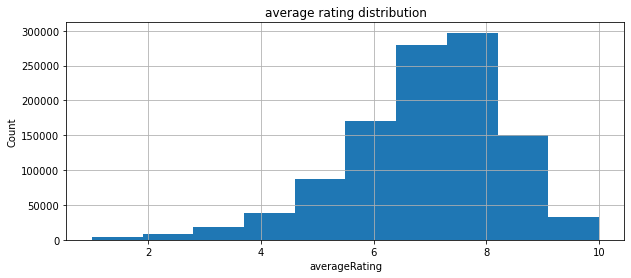

In [12]:
# plot graph of 'average rating column' 
plt.figure(figsize =(10, 4)) 
  
ratings_df['averageRating'].hist(bins = 10)
plt.xlabel('averageRating')
plt.ylabel('Count')
plt.title(r'average rating distribution')

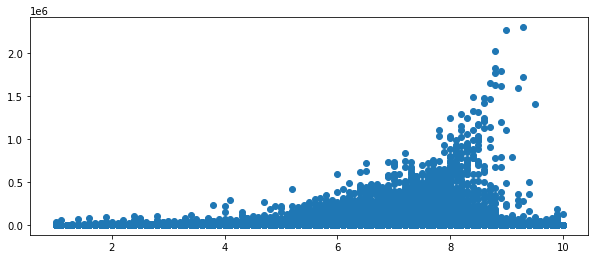

In [19]:
plt.figure(figsize =(10, 4)) 
  
plt.scatter(ratings_df['averageRating'],ratings_df['numVotes'], marker='o')

## Remaining Task: see the distriution of num of votes in ratings and remove less rating votes 

### Final Files to CSV

In [73]:
directors_df.to_csv('directors.csv')

In [74]:
final_cast.to_csv('actorCast.csv')